# **Automatidata Project**

#### **00_Company Background**

Automatidata works with its clients to transform their unused and stored data into useful solutions, such as performance dashboards, customer-facing tools, strategic business insights, and more. They specialize in identifying a client’s business needs and utilizing their data to meet those business needs. 

Automatidata is consulting for the *New York City Taxi and Limousine Commission (TLC)*. New York City TLC is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles. The agency has partnered with Automatidata to `develop a regression model that helps estimate taxi fares before the ride`, based on data that TLC has gathered.

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~ ~ ~ 

#### **01_Identify Data Types and Relevant Variables Using Python**
1. Understand the situation
    - Understand stakeholder request and mission
    - Understand provided taxi cab dataset and information
2. Understand the data
    - Create dataframe and prepare for Exploratory Data Analysis (EDA) activity
    - Inspect the data
3. Understand the variables
    - Use insights from the examination of the summary data to guide deeper investigation into specific variablesay. 

In [66]:
# import library
import pandas as pd            # library exercise for building dataframes 
import numpy as np             # numpy is used for working with arrays

import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [67]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [69]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


4. Observations:
   - No null values with 2 non-numeric values. They are `datetime`.
   - The distribution of `fare_amount` is worth to consider as the `min` is `-120` which is negative; not possible in reality.
   - The distribution of `trip_distance` also needs to be investigated as the `75%` of the ride is between 1-3 miles but the `max` is `33.96`.

5. Investigate more on `total_amount` and `trip_distance`, and other variables to find the most likely variables to help build a predictive model.

In [70]:
# Sort the data by trip distance from maximum to minimum value
trip_distance_sorted = df.sort_values(by = ['trip_distance'], ascending = False)[['trip_distance','total_amount']]
trip_distance_sorted.head(10)

,trip_distance,total_amount
9280,33.96,150.30
13861,33.92,258.21
6064,32.72,179.06
10291,31.95,131.80
29,30.83,111.38
18130,30.50,119.31
5792,30.33,73.20
15350,28.23,62.96
10302,28.20,70.27
2592,27.97,63.06


In [71]:
# Sort the data by total amount
total_amount_sorted = df.sort_values(by = ['total_amount'], ascending = False)[['total_amount', 'trip_distance']]
total_amount_sorted.head(10)

,total_amount,trip_distance
8476,1200.29,2.60
20312,450.30,0.00
13861,258.21,33.92
12511,233.74,0.00
15474,211.80,0.00
6064,179.06,32.72
16379,157.06,25.50
3582,152.30,7.30
11269,151.82,0.00
9280,150.30,33.96


In [72]:
# Sort the data by total amount
total_amount_sorted.tail(10)

,total_amount,trip_distance
5448,-4.3,0.25
4423,-4.3,0.06
10281,-4.3,0.00
8204,-4.8,0.41
20317,-4.8,0.24
11204,-5.3,0.64
14714,-5.3,0.40
17602,-5.8,0.46
20698,-5.8,0.70
12944,-120.3,0.17


In [73]:
# Discover the number of each payment type in the data
df['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

`payment_type`:
A numeric code signifying how the passenger paid for the trip:
- 1 = Credit card
- 2 = Cash
- 3 = No charge
- 4 = Dispute
- 5 = Unknown
- 6 = Voided trip

In [74]:
# Find the average tip for trips paid with credit card
avg_cc_tip = df[df['payment_type'] == 1]['tip_amount'].mean()
print('Average tip for trips paid with card credit is', avg_cc_tip)

# Find the average tip for trips paid with cash
avg_cash_tip = df[df['payment_type'] == 2]['tip_amount'].mean()
print('Average tip for trips paid with card credit is', avg_cash_tip)

Average tip for trips paid with card credit is 2.7298001965280054
Average tip for trips paid with card credit is 0.0


In [75]:
# How many times is each vendor ID represented in the data?
df['VendorID'].value_counts()

VendorID
2    12626
1    10073
Name: count, dtype: int64

In [76]:
# Filter the data for credit card payments only
credit_card = df[df['payment_type'] == 1]

# Filter the data for passenger count only
credit_card['passenger_count'].value_counts()

passenger_count
1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: count, dtype: int64

In [77]:
# Calculate the average tip amount for each passenger count (credit card payments only)
credit_card.groupby(['passenger_count']).mean(numeric_only = True)['tip_amount']


passenger_count
0    2.610370
1    2.714681
2    2.829949
3    2.726800
4    2.607753
5    2.762645
6    2.643326
Name: tip_amount, dtype: float64

6. After looking at the dataset, the variables that are most likely contribute to the predictive model build for taxi fare estimation are `total_amount` and `trip_distance`. This is due to the obvious visible trend after considering removing the possible error and outliers such as `tip_distance = 0 with total_amount > 0`.

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~ ~ ~ 

#### **02_Exploratory Data Analysis (EDA)**
1. Data Visualization
    - Identify the presence of outliers on relevant columns
    - Identify any trends or insight

**(1/n) We will start analyze `trip_distance`, `total_amount`, `tip_amount` and `passenger_count`:**

In [78]:
# Convert data columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Check whether the Dtype for these 2 columns have changed or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

`trip_distance` Column:

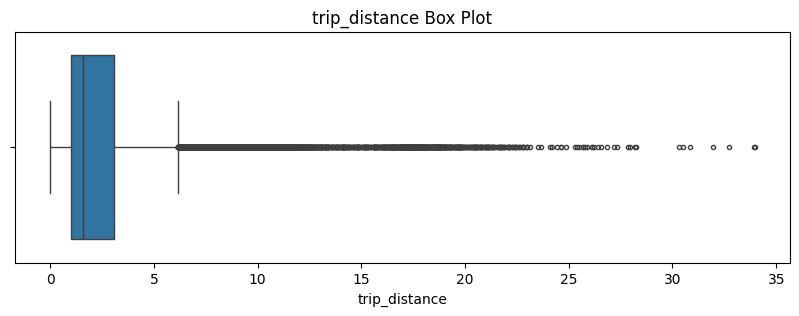

In [79]:
# Create box plot of trip_distance
plt.figure(figsize = (10, 3))
sns.boxplot(data = None, x = df['trip_distance'], fliersize = 3)
plt.title('trip_distance Box Plot');

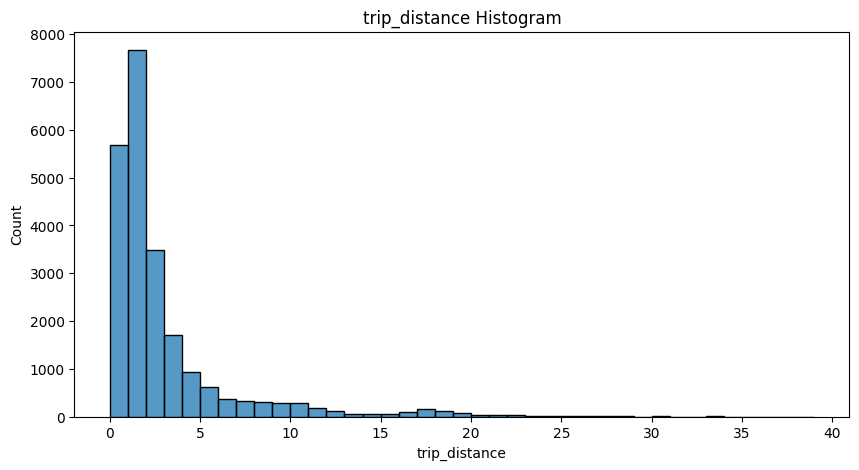

In [80]:
# Create histogram of trip_distance
plt.figure(figsize = (10, 5))
sns.histplot(df['trip_distance'], bins=range(0, 40, 1))
plt.title('trip_distance Histogram');

`trip_distance` Observation:
- Most of the journeys take are less than 3 miles
- Number of trips falls away steeply as the distance traveled increase

`total_amount` Column:

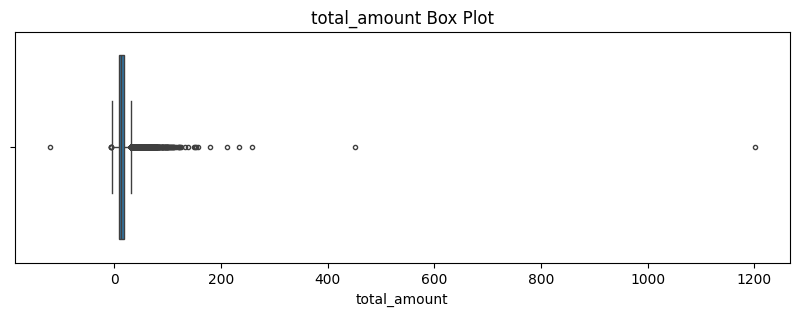

In [81]:
# Create box plot of total_amount
plt.figure(figsize = (10, 3))
sns.boxplot(data = None, x = df['total_amount'], fliersize = 3)
plt.title('total_amount Box Plot');

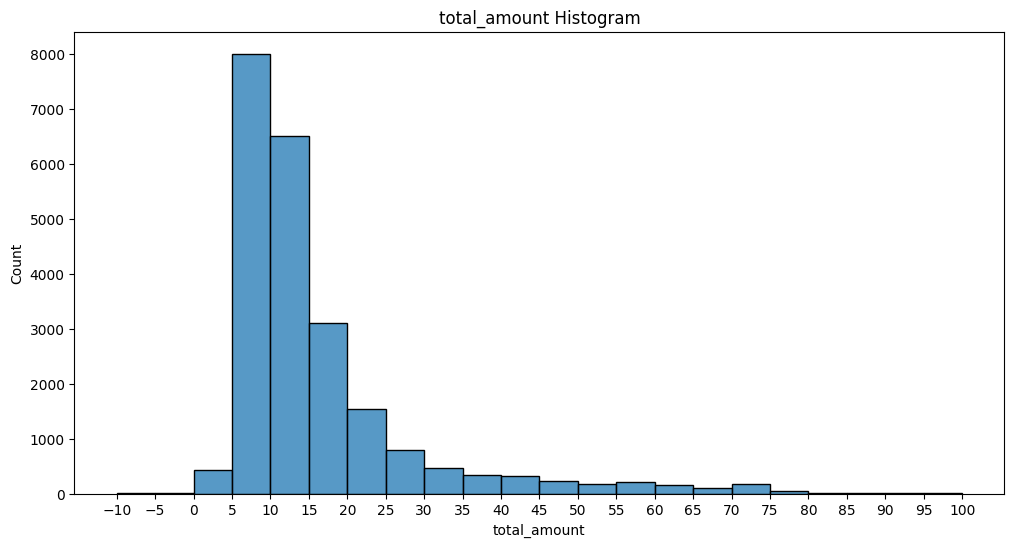

In [82]:
# Create histogram of total_amount
plt.figure(figsize = (12, 6))
ax = sns.histplot(df['total_amount'], bins=range(-10, 101, 5))
ax.set_xticks(range(-10, 101, 5))
plt.title('total_amount Histogram');

`total_amount` Observation:
- Most of the trips fall between \\$5.00 to \\$15.00
- Overall, the total amount of each trip has a distribution that skews to the right
- In other words, the mode will fall on the left, following by the median and the mean to the right

`tip_amount` Column:

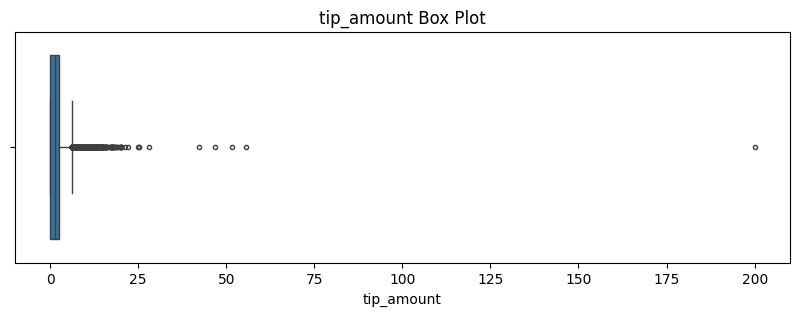

In [83]:
# Create box plot of tip_amount
plt.figure(figsize = (10, 3))
sns.boxplot(data = None, x = df['tip_amount'], fliersize = 3)
plt.title('tip_amount Box Plot');

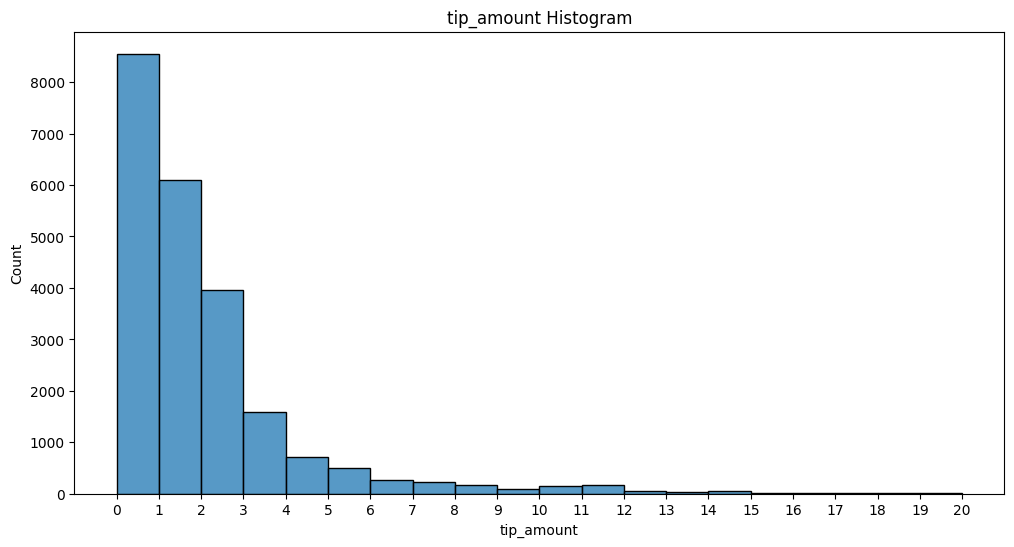

In [84]:
# Create histogram of tip_amount
plt.figure(figsize = (12, 6))
ax = sns.histplot(df['tip_amount'], bins=range(0, 21, 1))
ax.set_xticks(range(0, 21, 1))
plt.title('tip_amount Histogram');

`tip_amount` Observation:
- Most of the tips given by the riders fall between \\$0.00 to \\$3.00
- Overall, the tip amount has a distribution that skews to the right

`tip_amount` Column by `VendorID`:

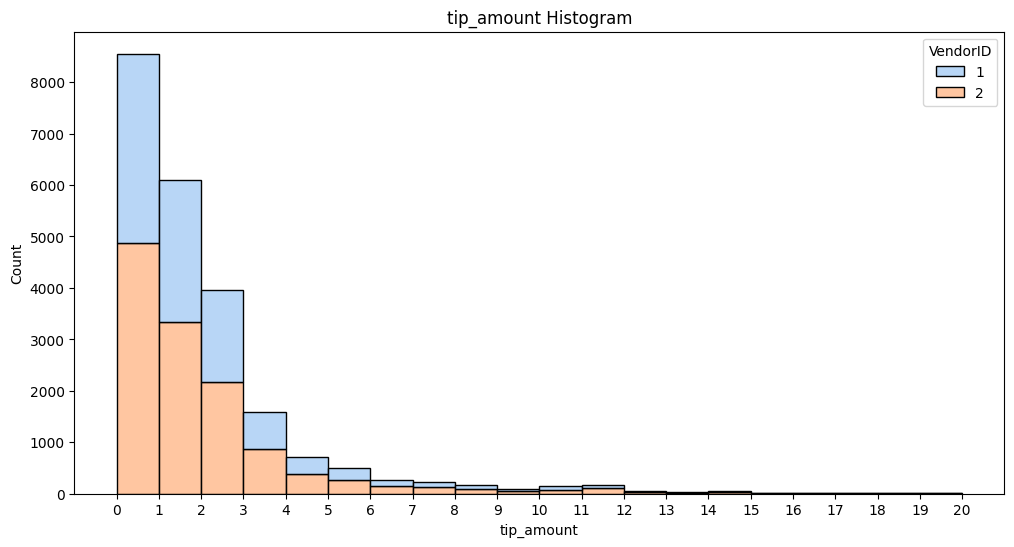

In [85]:
# Create histogram of tip_amount by vendor
plt.figure(figsize = (12, 6))
ax = sns.histplot(data = df, x = 'tip_amount', bins=range(0, 21, 1), hue = 'VendorID',
                 multiple = 'stack', palette = 'pastel')
ax.set_xticks(range(0, 21, 1))
plt.title('tip_amount Histogram');

`tip_amount` Column by `VendorID` Observation:
- There is no obvious or significant and noticeable trends / distribution of tips amount between the 2 vendors in the dataset

`tip_amount` > $10  Column by `VendorID`:

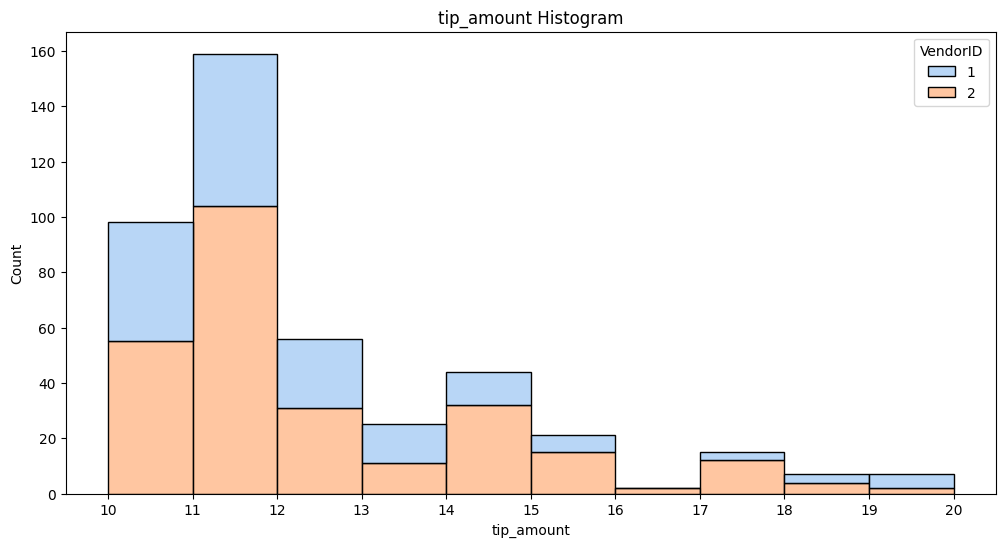

In [86]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] >10]
plt.figure(figsize = (12, 6))
ax = sns.histplot(data = tips_over_ten, x = 'tip_amount', bins=range(10, 21, 1), hue = 'VendorID',
                 multiple = 'stack', palette = 'pastel')
ax.set_xticks(range(10, 21, 1))
plt.title('tip_amount Histogram');

`tip_amount` > $10  Column by `VendorID` Observation:
- Again, there is not much difference between the 2 vendors even at this region

Mean `tip_amount` by `passenger_count` column:

In [87]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

Observation: 
- 2/3 of the rides are single occupancy with 16,117 rides
- The rides with 6 occupancies (the maximum) has around 700 rides
- The lowest rides count is 33 with 0 passenger count which does not make sense at all unless there is a certain reason behind it

In [88]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean(numeric_only = True)[['tip_amount']]
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


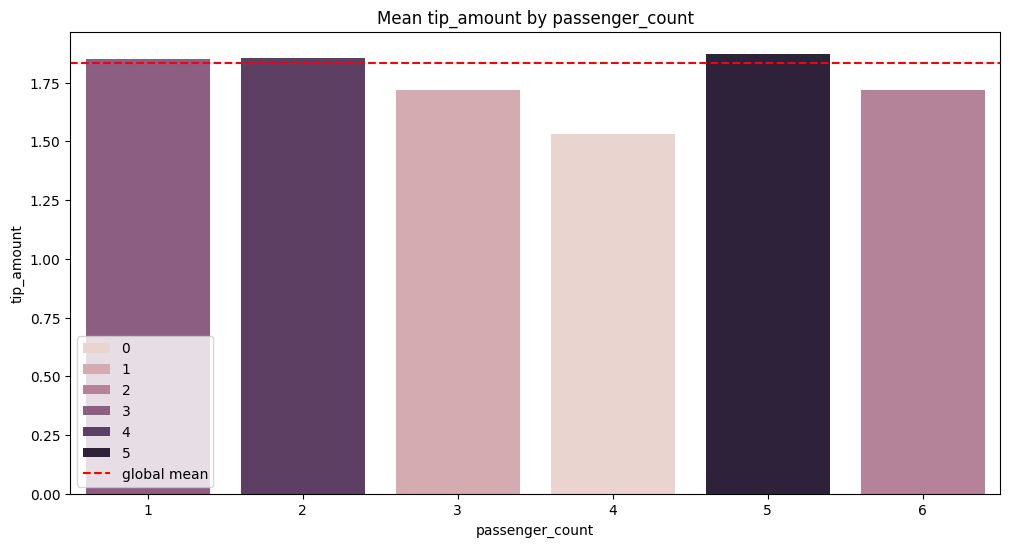

In [89]:
# Create bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette('Blues_d', len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize = (12, 6))
ax = sns.barplot(y = data['tip_amount'], x = data.index, hue = rank)
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip_amount by passenger_count');

Observation:
- Aside from 0 passengers, the trend for the mean tip amount by the passenger count is not obvious and varies very little
- Although the mean tip for 4-passenger rides drop significantly, overal trend is not visible in this case

**(2/n) Let's continue our EDA by calculating total ride count and revenue:**

In [90]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

# Observe the change
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,March,Saturday
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,May,Wednesday
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58,August,Tuesday
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,February,Saturday
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55,November,Friday


In [91]:
# Begin by calculating total number of rides for each month
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides.head(10)

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
Name: count, dtype: int64

In [92]:
# Re-order the monthly ride list
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index = month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

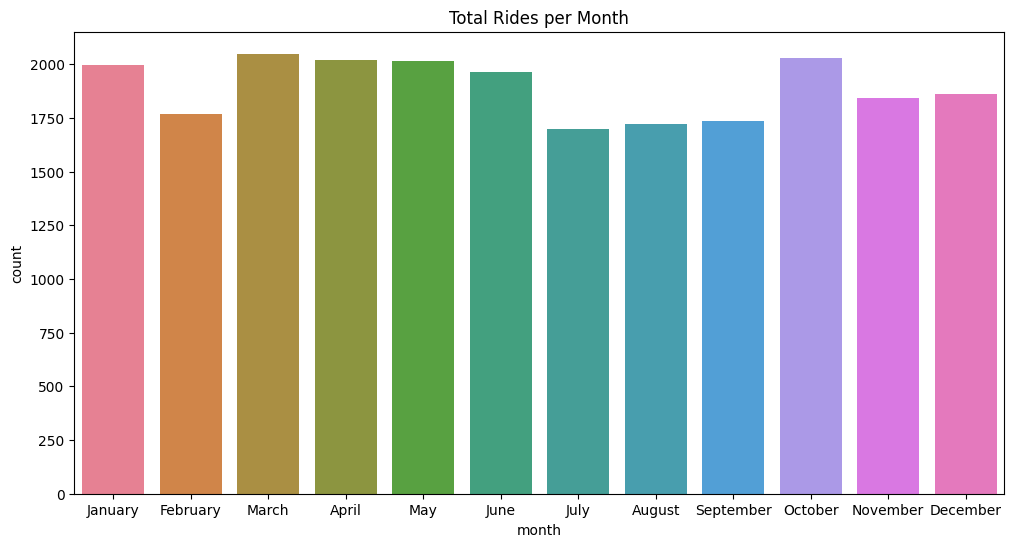

In [93]:
# Create a bar plot of total rides per month
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = monthly_rides.index, y = monthly_rides, hue = monthly_rides.index)
plt.title('Total Rides per Month');

Observation:
- Monthly rides are consistent except notable dips in July - September with possible reason of summer season (hot weather)
- This happens also in February except the reason might be not due to the hot temperature

In [94]:
# Repeat the above process, this time for rides by day
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index = day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

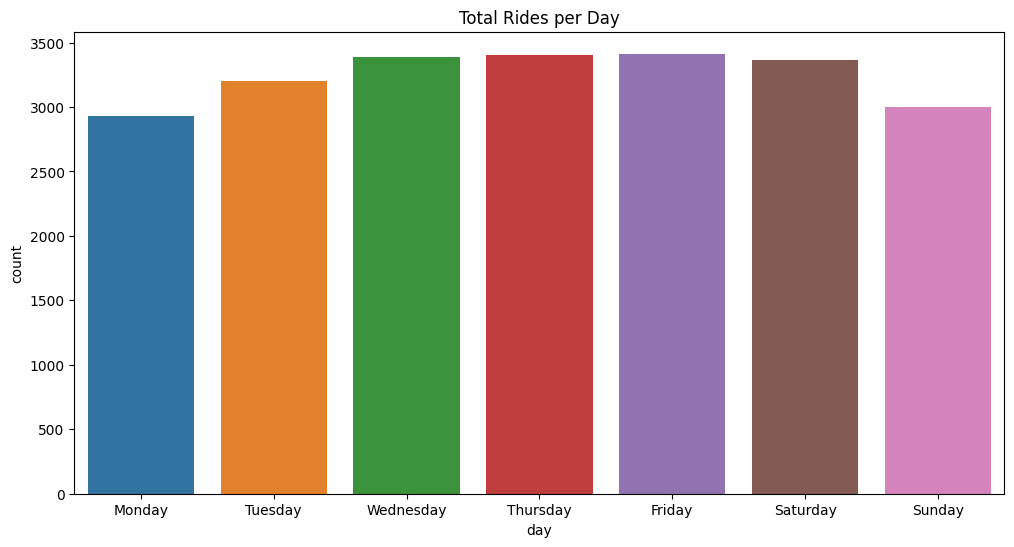

In [95]:
# Create bar plot for ride count by day
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = daily_rides.index, y = daily_rides, hue = daily_rides.index)
plt.title('Total Rides per Day');

Observation:
- Daily rides are consistent except notable dips on Sunday, Monday and Tuesday
- Surprisingly, the total number of rides on Sunday is lower

In [96]:
# Repeat the process, this time for total revenue by day
total_amount_day = df.groupby('day').sum(numeric_only = True)['total_amount']
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

day
Monday       49574.37
Tuesday      52527.14
Wednesday    55310.47
Thursday     57181.91
Friday       55818.74
Saturday     51195.40
Sunday       48624.06
Name: total_amount, dtype: float64

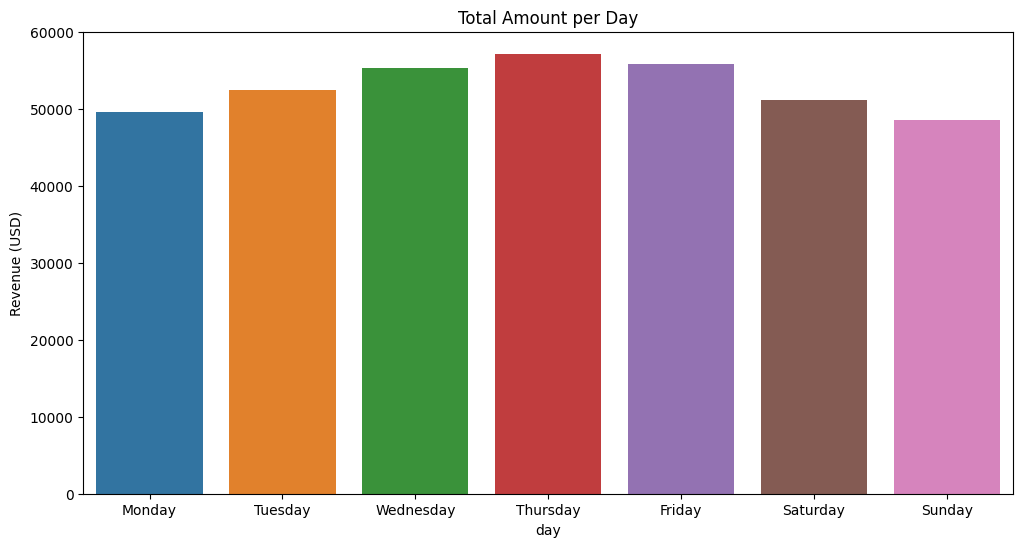

In [97]:
# Create bar plot of total revenue by day
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = total_amount_day.index, y = total_amount_day, hue = total_amount_day.index)
ax.set_ylabel('Revenue (USD)')
plt.title('Total Amount per Day');

Observation:
- Thursday has the highest gross revenue of all days
- Sunday and Monday have the least revenue
- Interestingly, Saturday has only 35 fewer rides than Thursday but the revenue drop approximately 10% than Thursday's revenue

In [98]:
# Repeat the process, this time for total revenue by month
total_amount_month = df.groupby('month').sum(numeric_only = True)['total_amount']
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

month
January      31735.25
February     28937.89
March        33085.89
April        32012.54
May          33828.58
June         32920.52
July         26617.64
August       27759.56
September    28206.38
October      33065.83
November     30800.44
December     31261.57
Name: total_amount, dtype: float64

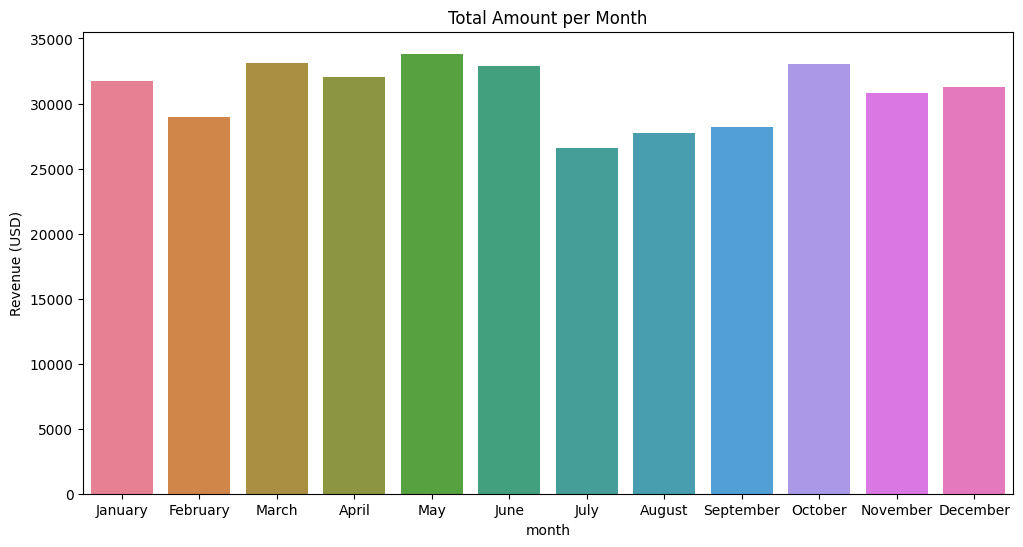

In [99]:
# Create a bar plot of total revenue by month
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = total_amount_month.index, y = total_amount_month, hue = total_amount_month.index)
ax.set_ylabel('Revenue (USD)')
plt.title('Total Amount per Month');

Observation:
- Unlike previous total revenue per day, monthly revenue generally follows the pattern of total monthly rides where the number of rides are lower in July - September
- This is also happens in February where a slight dip in that month

The below image is created by using `Tableau Public`, which can be easier to manipulate and present. From the image, we could almost see a clear straight line from the origin.

<img src="Tableau.jpg">

**(n/n) Next, we continue our EDA by plotting mean `trip_distance` by drop-off location and histogram of rides by drop-off location:**

In [100]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [101]:
# Calculate the mean trip distance for each drop-off location
mean_distance_by_dropoff = df.groupby('DOLocationID').mean(numeric_only = True)['trip_distance']

# Sort the results in ascending order by mean trip distance
mean_distance_by_dropoff = mean_distance_by_dropoff.sort_values(ascending = True)
mean_distance_by_dropoff

DOLocationID
207     1.200000
193     1.390556
237     1.555494
234     1.727806
137     1.818852
         ...    
51     17.310000
11     17.945000
210    20.500000
29     21.650000
23     24.275000
Name: trip_distance, Length: 216, dtype: float64

C:\Users\r14fadhli\AppData\Local\Temp\ipykernel_29940\1722848791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = mean_distance_by_dropoff.index, y = mean_distance_by_dropoff, order = mean_distance_by_dropoff.index, palette='rainbow')


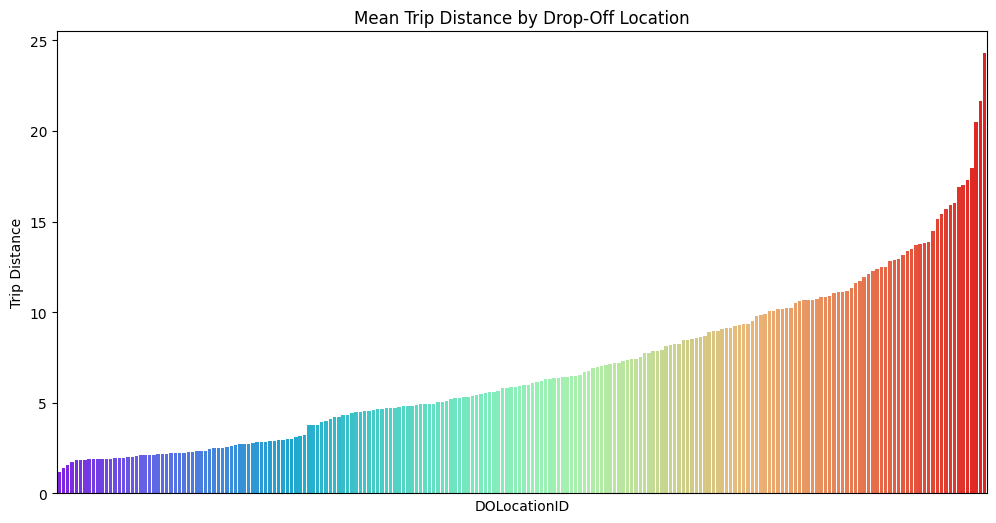

In [102]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = mean_distance_by_dropoff.index, y = mean_distance_by_dropoff, order = mean_distance_by_dropoff.index, palette='rainbow')
ax.set_ylabel('Trip Distance')
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean Trip Distance by Drop-Off Location');

Observation:
- This plot presents a characteristic curve related to the cumulative density function of a normal distribution
- In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain
- This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations

In [103]:
# Check if all drop-off locations are consecutively numbered
print(df['DOLocationID'].max())
print(len(set(df['DOLocationID'])))

print(df['DOLocationID'].max() - len(set(df['DOLocationID'])))

265
216
49


There are 49 numbers that do not represent a drop-off location.

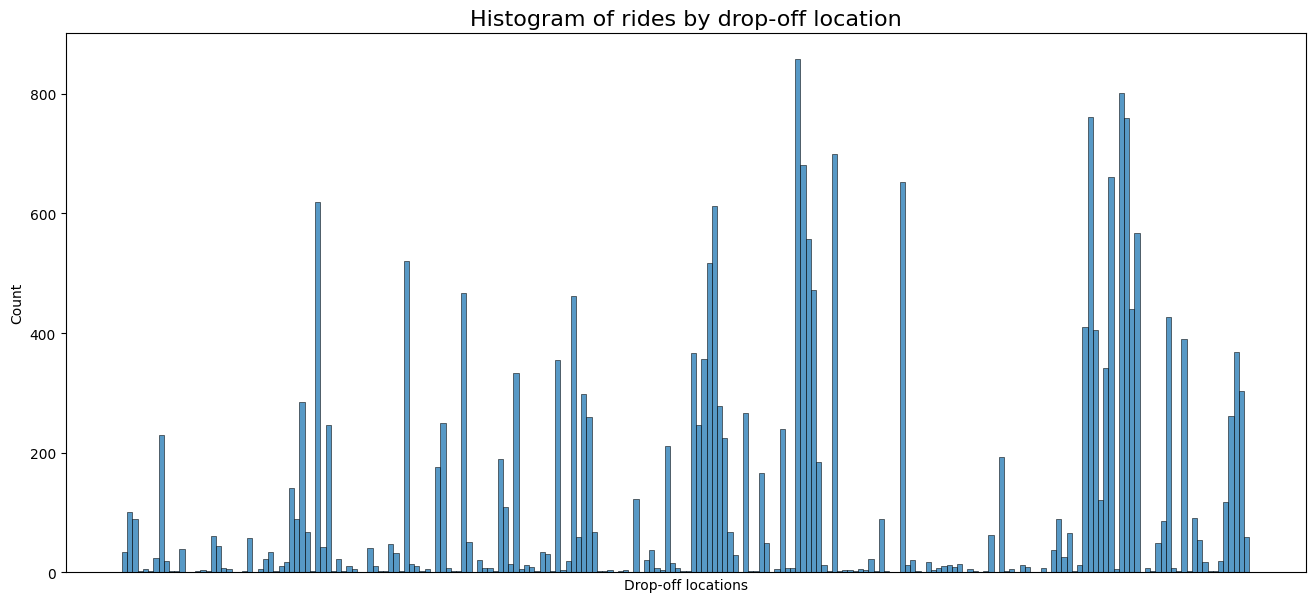

In [104]:
# Eliminate the spaces in the historgram that these missing numbers
plt.figure(figsize=(16,7))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(data = sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

Observation:
- Some locations have more tha 200+ drop-off locations
- Some other locations have relatively few trips
- This might be due to some tourist spots at certain location which cause the high-traffic
- However, it would be helpful to know the location that each ID corresponds with but unfortunately, this is not in the data

In [105]:
# Add 'trip_duration'into the dataset
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,March,Saturday,0 days 00:08:00
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,May,Wednesday,0 days 00:59:38
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,August,Tuesday,0 days 00:21:59
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,February,Saturday,0 days 00:12:07
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,November,Friday,0 days 00:20:26


2. Insight Gained and Discussion
    - There are no missing values in the dataset but the outliers occur in total_amount and trip_distance can be considered as extreme
    - There are outliers up to 35 miles for trip_distance
    - There are total_amount with negative values up to \$1,200 which make no sense at all
    - The highest distribution of trip distances are below 5 miles
    - During summer, the total rides are lower
    - There are several trips that have a trip_distance of \$0 --> Would this data impact our model?

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~ ~ ~ 

#### **03_Statistical Analysis**
1. Conduct A/B Testing
    - Apply descriptive statistics and hypothesis testing
    - Sample data and analyze whether there is a relationship between variables

**(1/n) Prepare for A/B testing between `payment_type` and `fare_amount`:**

Note: In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown

In [106]:
# descriptive stats code for EDA
df.describe(include='all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,...,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699,22699,22699
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,7,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March,Friday,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22600,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2049,3413,NaN
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,...,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,NaN,NaN,0 days 00:17:00.826600290
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,...,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,NaN,NaN,-1 days +23:43:01
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,...,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,NaN,NaN,0 days 00:06:39
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,...,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,NaN,NaN,0 days 00:11:11
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,...,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,NaN,NaN,0 days 00:18:23
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,NaN,265.000000,265.000000,...,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,NaN,NaN,0 days 23:59:33


In [107]:
# Find out the average fare amount for each payment type
df.groupby('payment_type')['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

Based on the above calculation:
- Payment_type = 1 (Credit Card) has higher number of fare_amount compare to the other payment_type
- Payment_type = 4 (Dispute) has the lower number of fare_amount

However, this difference might arise from random sampling, rather than being a true difference in fare amount. 

To assess whether the difference is statistically significant, hypothesis test is conducted.

**(2/n) Conduct A/B testing to analyze whether there is a relationship between `payment_type` and `fare_amount`:**

Hyphothesis Testing:
1.   Null hypothesis and the alternative hypothesis

        - Null Hypothesis $H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

        - Alternative Hypothesis $H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.
2.   Signficance level

        - 5% as the significance level with two-sample t-test.

In [109]:
# Hypothesis test, A/B test
# Significance level

credit_card = df[df['payment_type'] == 1]['fare_amount']
cash = df[df['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

Ttest_indResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12)

Results:

1. p-value = 6.797387473030518e-12
        - Since the p-value is significantly smaller than the significance level of 5%, **the null hypothesis is rejected**
   
3. Conclusion: There is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash

**(3/n) Business insight or business opportunity from the A/B testing result (relationship between `payment_type` and `fare_amount`):**

Business insight that we can get from the A/B testing:
- Customers who pay with credit card tend to generate more revenue
- Do customers who pay with credit card tend to use physical card or via phone (NFC etc.)?
- Is it OK to proceed with the campaign on encouraging the customers to use more cashless payment to gain more revenue?

**(4/n) Prepare for A/B testing between `VendorID` and `tip_amount`:**

Note: `VendorID` indicates the below agency:  

1= Creative Mobile Technologies, LLC; 

2= VeriFone Inc.

Meanwhile, `tip_amount` is automatically populated for credit card tips. Cash tips are not included.

In this case, we will to conduct A/B testing to investigate whether `VendorID` would effect the number of collected `tip_amount` or not


In [112]:
# Find out the average fare amount for each trip distance
df.groupby('VendorID')['tip_amount'].mean()

VendorID
1    1.83725
2    1.83461
Name: tip_amount, dtype: float64

**(5/n) Conduct A/B testing to analyze whether there is a relationship between `VendorID` and `tip_amount`:**

Hyphothesis Testing:
1.   Null hypothesis and the alternative hypothesis

        - Null Hypothesis $H_0$: There is no difference in the average tip amount collected between Creative Mobile Technologies, LLC and VeriFone Inc.

        - Alternative Hypothesis $H_A$: There is a difference in the average tip amount between Creative Mobile Technologies, LLC and VeriFone Inc.
2.   Signficance level

        - 5% as the significance level with two-sample t-test.

In [119]:
# Hypothesis test, A/B test
# Significance level

vendor_CMT = df[df['VendorID'] == 1]['tip_amount']
vendor_VF = df[df['VendorID'] == 2]['tip_amount']
stats.ttest_ind(a=vendor_CMT, b=vendor_VF, equal_var=False)

Ttest_indResult(statistic=0.06916190147016749, pvalue=0.9448614560353986)

Results:

1. p-value = 0.9448614560353986- Since the p-value is significantly higher than the significance level of 5%, **fail to reject the null hypothesis**
   
3. Conclusion: There is a no statistically significant difference in the average tip amount collected between Creative Mobile Technologies, LLC and VeriFone Inc

**(n/n) Business insight or business opportunity from the A/B testing result (relationship between `VendorID` and `tip_amount`):**

Business insight that we can get from the A/B testing:
- Both vendors collect the same amount of tip
- We could say that customers who use Creative Mobile Technologies agency would pay the same amount of tip if the same customers use VeriFone Inc agency; showing that both drivers and taxi conditions from both vendors are equal

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~ ~ ~ 

#### **04_Statistical Analysis**
1. Conduct A/B Testing
    - Apply descriptive statistics and hypothesis testing
    - Sample data and analyze whether there is a relationship between variables